<a href="https://colab.research.google.com/github/Boadzie/Jupyter-Notebooks/blob/master/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction

### Business Objective 

**The business objective is to predict the likelihood of a person being diagnosed with diabetes based on several diagnostic measurements of that person.**

### Columns

- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome

## Loading the Data

In [0]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
data = pd.read_csv("diabetes.csv") # loading the data

In [0]:
data.shape

(768, 9)

In [0]:
data.info() # looking at the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
data.isnull().values.any() # checking for NaN values

False

In [0]:
data.eq(0).sum() # checking for zeros

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [0]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] \
= data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [0]:
data.fillna(data.mean(), inplace=True)

In [0]:
data.eq(0).sum() # checking for zeros

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## Finding the Correlation between the Features

In [0]:
corr = data.corr()
print(corr)

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.127911  ...  0.544341  0.221898
Glucose                      0.127911  1.000000  ...  0.266534  0.492928
BloodPressure                0.208522  0.218367  ...  0.324595  0.166074
SkinThickness                0.082989  0.192991  ...  0.127872  0.215299
Insulin                      0.056027  0.420157  ...  0.136734  0.214411
BMI                          0.021565  0.230941  ...  0.025519  0.311924
DiabetesPedigreeFunction    -0.033523  0.137060  ...  0.033561  0.173844
Age                          0.544341  0.266534  ...  1.000000  0.238356
Outcome                      0.221898  0.492928  ...  0.238356  1.000000

[9 rows x 9 columns]


## Ploting the Correlation

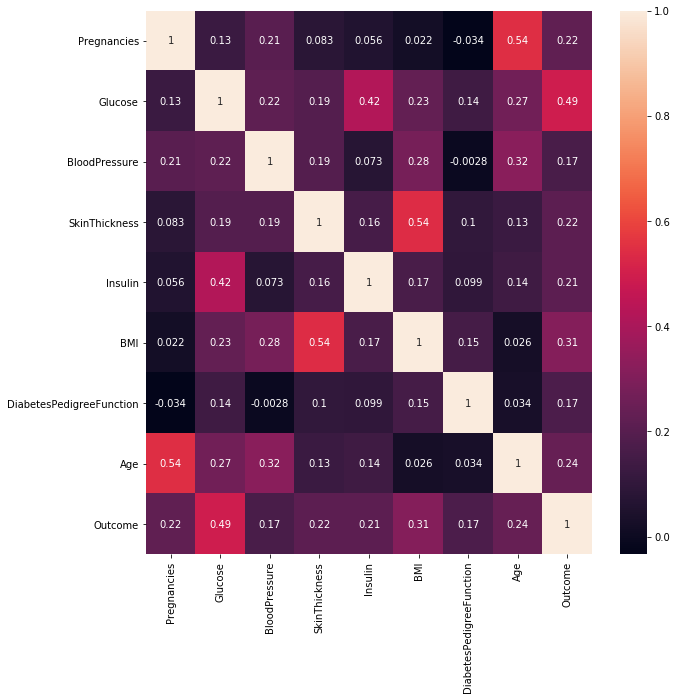

In [0]:
# Visualizing the correlation
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True)

In [0]:
# Print out the 4 largest correlated Features
print(data.corr().nlargest(4, 'Outcome').index)


#---print the top 4 correlation values---
print(data.corr().nlargest(4, 'Outcome').values[:,8])

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')
[1.         0.49292767 0.31192439 0.23835598]


## Evaluating the Algorithms

- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)—Linear and RBF Kernels

In [0]:
# Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score


#---features---
X = data[['Glucose','BMI','Age']]


#---label---
y = data.iloc[:,8]

log_regress = linear_model.LogisticRegression()

# evaluating the model
log_regress_score = cross_val_score(log_regress, X, y, cv=10, scoring='accuracy').mean()


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
print(log_regress_score)

0.7617737525632263


In [0]:
# saving the result
result = []
result.append(log_regress_score)

In [0]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# empty list that will hold cv (cross-validates) scores
cv_scores = []

# number of folds

folds = 10
# creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))

# perform k-fold cross validation---
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
  cv_scores.append(score)


# get the maximum score
knn_score = max(cv_scores)

# find the optimal k that gives the highest score
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 19
0.7721462747778537


In [0]:
# Support Vector Machines
from sklearn import svm

linear_svm = svm.SVC(kernel='linear')

linear_svm_score = cross_val_score(linear_svm, X, y, cv=10, scoring='accuracy').mean()

print(linear_svm_score)
result.append(linear_svm_score)

0.7656527682843473


In [0]:
# Uisng the RBF Kernel
rbf = svm.SVC(kernel='rbf')

rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [0]:
print(rbf_score)
result.append(rbf_score)

0.6353725222146275


In [0]:
# Selecting the Best Performing Algorithm

# algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
# cv_mean = pd.DataFrame(result,index = algorithms)
# cv_mean.columns=["Accuracy"]
# cv_mean.sort_values(by="Accuracy", ascending=False)

## Training and Saving the Model

In [0]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

In [0]:
import pickle

#save the model to disk
filename = 'diabetes.sav'

# write to the file using write and binary mode
pickle.dump(knn, open(filename, 'wb'))

In [0]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [0]:
# Making a prediction
Glucose = 65
BMI = 70
Age = 50


prediction = loaded_model.predict([[Glucose, BMI, Age]])

print(prediction)

if (prediction[0]==0):
  print("Non-diabetic")
else:
  print("Diabetic")

[0]
Non-diabetic


In [0]:
# Getting the Probability of the Prediction

proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[0.94736842 0.05263158]]
Confidence: 94.74%
